In [23]:
from numpy import array
from numpy import argmax
from keras.optimizers import RMSprop, Adam
#from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
#from keras.optimizers import SGD
from keras import optimizers
from keras.utils import np_utils
np.random.seed(1671)

Graph plot for training and testing data

In [5]:
def graph_plot(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

In [9]:
dataset = pd.read_csv('nyc_for_ann.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726054 entries, 0 to 1726053
Data columns (total 17 columns):
VendorID                 int64
RatecodeID               int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PickUp_hr                int64
DOLocationID             int64
zone                     int64
dtypes: float64(9), int64(8)
memory usage: 223.9 MB


Dropped all the features that has high correlation (refer to the correlation test) and date time value

In [11]:
dataset.columns

Index(['VendorID', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'dispatch', 'PickUp_hr', 'DOLocationID', 'zone'],
      dtype='object')

In [12]:
X = dataset.drop('zone',axis=1)
y = dataset['zone']

X.head()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PickUp_hr,DOLocationID
0,2,1,2,1.36,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2,1.0,1,11,41
1,1,1,1,0.70,4.0,0.5,0.5,1.30,0.0,0.3,6.60,1,1.0,1,4,95
2,2,1,2,4.65,20.5,1.0,0.5,4.46,0.0,0.3,26.76,1,1.0,1,19,225
3,2,1,5,2.17,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2,1.0,1,6,95
4,2,1,1,0.89,6.0,0.0,0.5,0.00,0.0,0.3,6.80,2,1.0,1,15,116


We decide to randomly drop with the dropout probability some of the values propagated inside our internal dense network of hidden layers. In machine learning, this is a well-known form of regularization

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726054 entries, 0 to 1726053
Data columns (total 16 columns):
VendorID                 int64
RatecodeID               int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PickUp_hr                int64
DOLocationID             int64
dtypes: float64(9), int64(7)
memory usage: 210.7 MB


In [13]:
NB_EPOCH = 20
BATCH_SIZE = 128
VALIDATION_SPLIT=0.2
VERBOSE = 1
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
DROPOUT = 0.3

We have to map the zones to distinct categories; example in our target column we have something like 7,7,7,5,6,3,2... which are our zones. Now first we decide how many unique zones/classes are here. Then map each zones to a value here its a vector. Example for zone 7 it would [0,0,0,0,0,0,1,0,0,0,0,0,0,....]

In [14]:
def OneHotEncoding(y):
    data = array(y)
    encoded = to_categorical(data)
    print(np.shape(encoded))
    return encoded

Multilayer Perceptron Model

from keras import optimizers

model = Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [76]:
#def model(N_HIDDEN,RESHAPED,NB_CLASSES,OPTIMIZER,DROPOUT):
def model():
    model = Sequential()
    model.add(Dense(output_dim = 128, activation='relu', input_dim = 16))
    #model.add(Activation('relu'))
    model.add(Dense(output_dim = 128,activation='relu'))#, input_dim = 128))
    #model.add(Activation('relu'))
    model.add(Dense(output_dim = 25))#, input_dim = 64))
    model.add(Activation('softmax'))
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #model.compile(loss='mean_squared_error', optimizer=sgd)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=sgd)
    return model

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#RESHAPED = len(X_train.columns)

In [78]:
#y_train = OneHotEncoding(y_train)
#NB_CLASSES = y_train.shape[1]

In [79]:
#X_train.Index.drop
X_train.head()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PickUp_hr,DOLocationID
826171,2,1,2,7.53,21.5,0.5,0.5,2.74,0.0,0.3,25.54,1,1.0,1,5,138
871203,1,1,2,1.20,7.0,0.5,0.5,1.70,0.0,0.3,10.00,1,1.0,1,4,7
1476514,2,1,1,4.20,16.5,1.0,0.5,0.00,0.0,0.3,18.30,2,1.0,1,16,235
811472,2,1,1,1.18,6.5,0.0,0.5,0.00,0.0,0.3,7.30,1,1.0,1,9,74
1092500,2,1,6,2.77,12.0,0.0,0.5,0.00,0.0,0.3,12.80,2,1.0,1,11,197


In [80]:
model= model()

In [81]:
history = model.fit(X_train, y_train,
                    batch_size=32, nb_epoch=10, 
                    verbose=1, 
                    validation_split=0.3)

Train on 966590 samples, validate on 414253 samples
Epoch 1/10


KeyError: '[448900 688662 939594 855534 612705 575682 919280 943184 285045 326648\n 765964 227205 821465 122947 909986 960171 438401 293525  26129 905016\n 602053 951059 207968 167930 248654 936267 105129 368195  95762 632976\n 670616 352936] not in index'

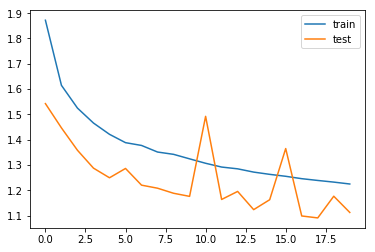

In [12]:
graph_plot(history)

Prediction

In [13]:
y_test = OneHotEncoding(y_test)

(342747, 261)


In [14]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

342747/342747 [==============================] - 10s 28us/step
Test score: 1.1110946155712755
Test accuracy: 0.5441973233910086
